In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
df=pd.read_csv('FuelConsumption.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [7]:
main_df=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
main_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [9]:
mask=np.random.rand(len(main_df))<0.8
train=df[mask]
test=df[~mask]

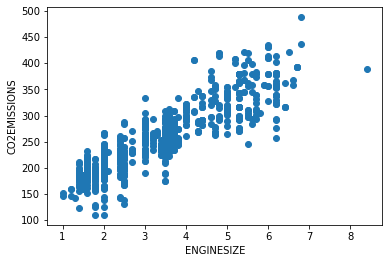

In [13]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [17]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
lin_reg.fit(train_x,train_y)
print('Coefficient:',lin_reg.coef_)[]
print('Interrcept:',lin_reg.intercept_)


Coefficient: [[39.29209291]]
Interrcept: [124.9665146]


Text(0, 0.5, 'CO2EMISSIONS')

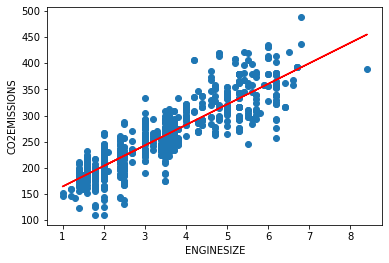

In [21]:
plt.scatter(train_x,train_y)
plt.plot(train_x,lin_reg.coef_*train_x+lin_reg.intercept_,color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [22]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
pridicted = lin_reg.predict(test_x)


In [29]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(pridicted - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pridicted - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pridicted , test_y) )

Mean absolute error: 25.60
Residual sum of squares (MSE): 1090.88
R2-score: 0.64


In [1]:
from sklearn.externals import joblib


ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\python38\lib\site-packages\sklearn\externals\__init__.py)